### prep

In [6]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

In [12]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 20s 5us/step


In [15]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

train_images.shape

(60000, 28, 28)

In [20]:
test_images.shape

(10000, 28, 28)

In [41]:
train_labels.shape

(60000,)

In [42]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [44]:
train_labels_oh = np.zeros((train_labels.shape[0], 10))
train_labels_oh[np.arange(train_labels.shape[0]), train_labels] = 1

train_labels_oh[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [45]:
test_labels_oh = np.zeros((test_labels.shape[0], 10))
test_labels_oh[np.arange(test_labels.shape[0]), test_labels] = 1

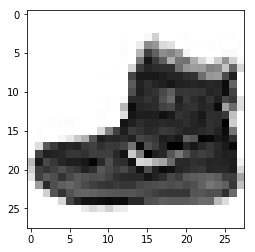

In [46]:
plt.imshow(train_images[0], cmap='Greys')

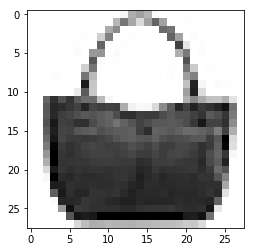

In [47]:
plt.imshow(train_images[100], cmap='Greys')

In [48]:
labels = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover', 
    3:'Dress', 
    4:'Coat', 
    5:'Sandal', 
    6:'Shirt', 
    7:'Sneaker', 
    8:'Bag', 
    9:'Ankle boot'
}

In [49]:
tf.reset_default_graph()

In [50]:
LEARN_RATE = 0.1

### tensor definitions

In [51]:
X = tf.placeholder(tf.float32, [None, 28, 28])
X_shaped = tf.reshape(X, [-1, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, 10])

# convolution
def conv2d(X, w):
    return tf.nn.conv2d(X,
                       w,
                       strides=[1,1,1,1],
                       padding='SAME')
# max pooling
def maxpool2d(X):
    return tf.nn.max_pool(X,
                         ksize=[1,2,2,1],
                         strides=[1,2,2,1],
                         padding='SAME')

# weight + bias inits
# [filter_shape_x, filter_shape_y, inputs (channels), outputs]
w_c1 = tf.Variable(tf.random_normal([5, 5, 1, 32]))
w_c2 = tf.Variable(tf.random_normal([5, 5, 32, 64]))

b_c1 = tf.Variable(tf.random_normal([32]))
b_c2 = tf.Variable(tf.random_normal([64]))

# feed through convolution layers
act_c1 = tf.nn.relu(conv2d(X_shaped, w_c1) + b_c1)
c1 = maxpool2d(act_c1)

act_c2 = tf.nn.relu(conv2d(c1, w_c2) + b_c2)
c2 = maxpool2d(act_c2)

# flatten
x_flat = tf.reshape(c2, [-1, 7*7*64])

# fully connected hidden layer
w_fc = tf.Variable(tf.random_normal([7*7*64, 1024]))
b_fc = tf.Variable(tf.random_normal([1024]))

fc = tf.nn.relu(tf.matmul(x_flat, w_fc) + b_fc)

# output layer
w_out = tf.Variable(tf.random_normal([1024, 10]))
b_out = tf.Variable(tf.random_normal([10]))

output = tf.matmul(fc, w_out) + b_out
y_hat = tf.nn.softmax(output)

# cost & optimizer
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output,
                                                                           labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=LEARN_RATE)\
        .minimize(cross_entropy_loss)

# accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_hat, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### run session

In [54]:
EPOCHS = 5
BATCH_SIZE = 100

In [55]:
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    
    total_batch = int(len(train_labels) / BATCH_SIZE)
    
    for epoch in range(EPOCHS):
        avg_cost = 0
        for i in range(total_batch):
            batch_X = train_images[i*BATCH_SIZE: (i+1)*BATCH_SIZE]
            batch_y = train_labels_oh[i*BATCH_SIZE: (i+1)*BATCH_SIZE]
            
            _, c = sess.run([optimizer, cross_entropy_loss],
                           feed_dict={X: batch_X, y: batch_y})
            
            avg_cost += (c / total_batch)
        
        print('EPOCH = ', epoch+1, '\t|\tCOST = ', avg_cost)
    
    print('TEST ACCURACY:',
          sess.run(accuracy,
                  feed_dict={X: test_images, y: test_labels_oh}))

EPOCH =  1 	|	COST =  347179.6676938232
EPOCH =  2 	|	COST =  3.2254373617966974
EPOCH =  3 	|	COST =  3.096385211547218
EPOCH =  4 	|	COST =  3.059713779290516
EPOCH =  5 	|	COST =  3.146386605898537
TEST ACCURACY: 0.1
